In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_excel("/content/drive/MyDrive/Tanjila_mam/DS-Healthcare_version_2.xlsx")

In [ ]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(888817, 13)

In [ ]:
!pip install -q flwr["simulation"] tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 76.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 MB 8.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 4.25.3 which is incompatible.


In [ ]:
import math
from typing import Dict, List, Tuple
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import flwr as fl
from flwr.common import Metrics
from flwr.simulation.ray_transport.utils import enable_tf_gpu_growth

VERBOSE = 0
NUM_CLIENTS = 100
count_rounds=0
number_of_rounds = 15
saving_model_name = ""




#ANN
def get_model():

    model = tf.keras.models.Sequential(
        [
            tf.keras.layers.Flatten(input_shape=[9]),
            tf.keras.layers.Dense(128, activation="relu"),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(3, activation="softmax"),
        ]
    )
    global saving_model_name,NUM_CLIENTS,number_of_rounds
    saving_model_name = str(NUM_CLIENTS)+"_"+str(number_of_rounds)+"_ann"
    model.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])
    return model








"""
#CNN

def get_model():

  model = tf.keras.Sequential([
      tf.keras.layers.Dense(256, activation="relu", input_shape=(9,)),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(128, activation="relu"),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(64, activation="relu"),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(32, activation="relu"),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(3, activation="softmax"),
  ])
  global saving_model_name,NUM_CLIENTS,number_of_rounds
  saving_model_name = str(NUM_CLIENTS)+"_"+str(number_of_rounds)+"cnn"
  model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
  return model

"""





"""
#complex CNN

def get_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(512, activation="relu", input_shape=(9,)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(8, activation="relu"),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(3, activation="softmax")
    ])

    global saving_model_name,NUM_CLIENTS,number_of_rounds
    saving_model_name = str(NUM_CLIENTS)+"_"+str(number_of_rounds)+"com_cnn"
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model


"""



"""
#LSTM

def get_model():
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(64, activation="relu", input_shape=(9, 1), return_sequences=True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(32, activation="relu", return_sequences=True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(3, activation="softmax")
    ])
    global saving_model_name,NUM_CLIENTS,number_of_rounds
    saving_model_name = str(NUM_CLIENTS)+"_"+str(number_of_rounds)+"lstm"

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

"""

"""

#Bi-LSTM

def get_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, activation="relu", return_sequences=True), input_shape=(9, 1)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, activation="relu", return_sequences=True)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, activation="relu")),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(3, activation="softmax")
    ])
    global saving_model_name, NUM_CLIENTS, number_of_rounds
    saving_model_name = str(NUM_CLIENTS) + "_" + str(number_of_rounds) + "_bi_lstm"

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

"""



class FlowerClient(fl.client.NumPyClient):
    def __init__(self, x_train, y_train, x_val, y_val) -> None:
        # Create model
        self.model = get_model()
        self.x_train, self.y_train = x_train, y_train
        self.x_val, self.y_val = x_val, y_val

    def get_parameters(self, config):
        return self.model.get_weights()

    def fit(self, parameters, config):
        self.model.set_weights(parameters)
        self.model.fit(
            self.x_train, self.y_train, epochs=1, batch_size=32, verbose=VERBOSE
        )
        return self.model.get_weights(), len(self.x_train), {}

    def evaluate(self, parameters, config):
        self.model.set_weights(parameters)
        loss, acc = self.model.evaluate(
            self.x_val, self.y_val, batch_size=64, verbose=VERBOSE
        )
        return loss, len(self.x_val), {"accuracy": acc}



def get_client_fn(dataset_partitions):
    """Return a function to be executed by the VirtualClientEngine in order to construct
    a client."""

    def client_fn(cid: str) -> fl.client.Client:
        """Construct a FlowerClient with its own dataset partition."""

        # Extract partition for client with id = cid
        x_train, y_train = dataset_partitions[int(cid)]
        # Use 10% of the client's training data for validation
        split_idx = math.floor(len(x_train) * 0.9)
        x_train_cid, y_train_cid = (
            x_train[:split_idx],
            y_train[:split_idx],
        )
        x_val_cid, y_val_cid = x_train[split_idx:], y_train[split_idx:]

        # Create and return client
        return FlowerClient(x_train_cid, y_train_cid, x_val_cid, y_val_cid)

    return client_fn






#non balancing
def partition_dataset():
    encoder=LabelEncoder()
    df['Type']=encoder.fit_transform(df['Type'])
    X = df.iloc[:,4:]
    y = df['Type']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
    x_train = x_train.to_numpy()
    x_test = x_test.to_numpy()
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()
    testset = (x_test,y_test)
    print(type(x_train))
    partitions = []
    # We keep all partitions equal-sized in this example
    partition_size = math.floor(len(x_train) / NUM_CLIENTS)
    for cid in range(NUM_CLIENTS):
        # Split dataset into non-overlapping NUM_CLIENT partitions
        idx_from, idx_to = int(cid) * partition_size, (int(cid) + 1) * partition_size
        partitions.append((x_train[idx_from:idx_to], y_train[idx_from:idx_to]))
    return partitions, testset





"""
#balancing
def partition_dataset():
    encoder = LabelEncoder()
    df['Type'] = encoder.fit_transform(df['Type'])
    X = df.iloc[:, 4:]
    y = df['Type']

    # Apply SMOTE to balance the dataset
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    print("Original dataset shape:", Counter(y))
    print("Resampled dataset shape:", Counter(y_resampled))

    x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=0)
    print("y_train dataset shape:", Counter(y_train))
    print("y_test dataset shape:", Counter(y_test))

    x_train = x_train.to_numpy()
    x_test = x_test.to_numpy()
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()
    testset = (x_test, y_test)
    print(type(x_train))
    partitions = []
    # We keep all partitions equal-sized in this example
    partition_size = math.floor(len(x_train) / NUM_CLIENTS)
    for cid in range(NUM_CLIENTS):
        # Split dataset into non-overlapping NUM_CLIENT partitions
        idx_from, idx_to = int(cid) * partition_size, (int(cid) + 1) * partition_size
        partitions.append((x_train[idx_from:idx_to], y_train[idx_from:idx_to]))
    return partitions, testset
"""





"""
def partition_data():

    encoder=LabelEncoder()
    df['Type']=encoder.fit_transform(df['Type'])
    X = df.iloc[:,4:]
    y = df['Type']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
    x_train = x_train.to_numpy()
    x_test = x_test.to_numpy()
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()
    testset = (x_test,y_test)
    print(type(x_train))
    partitions = []
    # We keep all partitions equal-sized in this example
    partition_size = math.floor(len(x_train) / NUM_CLIENTS)
    for cid in range(NUM_CLIENTS):
        # Split dataset into non-overlapping NUM_CLIENT partitions
        idx_from, idx_to = int(cid) * partition_size, (int(cid) + 1) * partition_size
        # Apply SMOTE to balance the dataset
        smote = SMOTE()
        X_temp, y_temp = smote.fit_resample(x_train[idx_from:idx_to], y_train[idx_from:idx_to])
        print('_____________________----------------____________________---------------_________________-----------------')
        print("Partition:", Counter(y_temp))
        partitions.append((X_temp, y_temp))
    return partitions, testset

"""







def weighted_average(metrics: List[Tuple[int, Metrics]]) -> Metrics:
    """Aggregation function for (federated) evaluation metrics, i.e. those returned by
    the client's evaluate() method."""
    # Multiply accuracy of each client by number of examples used
    accuracies = [num_examples * m["accuracy"] for num_examples, m in metrics]
    examples = [num_examples for num_examples, _ in metrics]
    # Aggregate and return custom metric (weighted average)
    return {"accuracy": sum(accuracies) / sum(examples)}


def get_evaluate_fn(testset):
    x_test, y_test = testset

    def evaluate(
        server_round: int,
        parameters: fl.common.NDArrays,
        config: Dict[str, fl.common.Scalar],
    ):
        model = get_model()  # Construct the model
        model.set_weights(parameters)  # Update model with the latest parameters
        loss, accuracy = model.evaluate(x_test, y_test, verbose=VERBOSE)
        global count_rounds
        global number_of_rounds

        print("-------------------________________________---------------",number_of_rounds-count_rounds)

        if number_of_rounds-count_rounds == 0:
            global saving_model_name
            model.save(saving_model_name+"_model.h5")  # Replace with your desired filename"""

        count_rounds+=1
        return loss, {"accuracy": accuracy}

    return evaluate



# Enable GPU growth in your main process
enable_tf_gpu_growth()

# Create dataset partitions (needed if your dataset is not pre-partitioned)
partitions, testset = partition_dataset()

# Create FedAvg strategy
strategy = fl.server.strategy.FedAvg(
    fraction_fit=0.1,  # Sample 10% of available clients for training
    fraction_evaluate=0.05,  # Sample 5% of available clients for evaluation
    min_fit_clients=10,  # Never sample less than 10 clients for training
    min_evaluate_clients=5,  # Never sample less than 5 clients for evaluation
    min_available_clients=int(
        NUM_CLIENTS * 0.75
    ),  # Wait until at least 75 clients are available
    evaluate_metrics_aggregation_fn=weighted_average,  # aggregates federated metrics
    evaluate_fn=get_evaluate_fn(testset),  # global evaluation function
)



# client needs exclusive access to these many resources in order to run
client_resources = {"num_cpus": 1, "num_gpus": 0.0}



# Start simulation
history = fl.simulation.start_simulation(
    client_fn=get_client_fn(partitions),
    num_clients=NUM_CLIENTS,
    config=fl.server.ServerConfig(num_rounds=number_of_rounds),
    strategy=strategy,
    client_resources=client_resources,
    actor_kwargs={
        "on_actor_init_fn": enable_tf_gpu_growth  # Enable GPU growth upon actor init.
    },
)



import matplotlib.pyplot as plt

print(f"{history.metrics_centralized = }")

global_accuracy_centralised = history.metrics_centralized["accuracy"]
round = [data[0] for data in global_accuracy_centralised]
acc = [100.0 * data[1] for data in global_accuracy_centralised]
plt.plot(round, acc)
plt.grid(True)
plt.ylabel("Accuracy (%)")
plt.xlabel("Round")
plt.title(str(NUM_CLIENTS)+" clients with "+str(number_of_rounds)+" clients per round")

#Model Evaluation

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support


def eva(loaded_model):
    x_test, y_test = testset
    loss, accuracy = loaded_model.evaluate(x_test, y_test)
    print("Accuracy:", accuracy)
    print("Loss:", loss)

    predicted_probabilities = loaded_model.predict(x_test)
    predictions = predicted_probabilities.argmax(axis=-1)

    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, predictions, average='weighted')
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1_score)

    # Confusion Matrix evaluation
    conf_matrix = confusion_matrix(y_test, predictions)
    print("Confusion Matrix:\n", conf_matrix)
    class_names = ['arrhythmic', 'healthy', 'ischemic']
    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.4)  # Adjust font scale for overall figure

    ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                     xticklabels=class_names,
                     yticklabels=class_names)
    plt.xlabel("Predicted Labels", labelpad=10, fontsize=14, fontweight='bold')
    plt.ylabel("True Labels", labelpad=10, fontsize=14, fontweight='bold')
    plt.title("Confusion Matrix", fontsize=16, fontweight='bold')

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12, fontweight='bold')
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, fontweight='bold')

    plt.show()



def ROC(loaded_model):
    x_test, y_test = testset
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test_one_hot = lb.transform(y_test)

    # Get the predicted probabilities for each class
    predicted_probabilities = loaded_model.predict(x_test)

    # Compute the ROC curve and AUC score for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(lb.classes_)):
        fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], predicted_probabilities[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and AUC score
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_one_hot.ravel(), predicted_probabilities.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot ROC curve
    plt.figure(figsize=(12, 10))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    # Class names mapping
    class_names = ['arrhythmic', 'healthy', 'ischemic']

    for i in range(len(lb.classes_)):
        plt.plot(fpr[i], tpr[i], lw=2,
                 label='ROC curve of {0} (area = {1:0.2f})'
                       ''.format(class_names[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
    plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16, fontweight='bold')
    plt.legend(loc="lower right", prop={'size': 12, 'weight': 'bold'})
    plt.xticks(fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12, fontweight='bold')

    # Make the grid more dense
    plt.grid(True, linewidth=0.5, alpha=0.5)
    plt.show()


In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model("/content/final_model.h5")

In [ ]:
eva(loaded_model)

9166/9166 [==============================] - 17s 2ms/step - loss: 636.7599 - accuracy: 0.7985
Accuracy: 0.7984930872917175
Loss: 636.7599487304688
9166/9166 [==============================] - 15s 2ms/step
Precision: 0.7922795201573517
Recall: 0.7984930619481095
F1-Score: 0.7638779747111176
Confusion Matrix:
 [[     0      0  13112]
 [     0  43724  44281]
 [     0   1711 190482]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


9166/9166 [==============================] - 15s 2ms/step


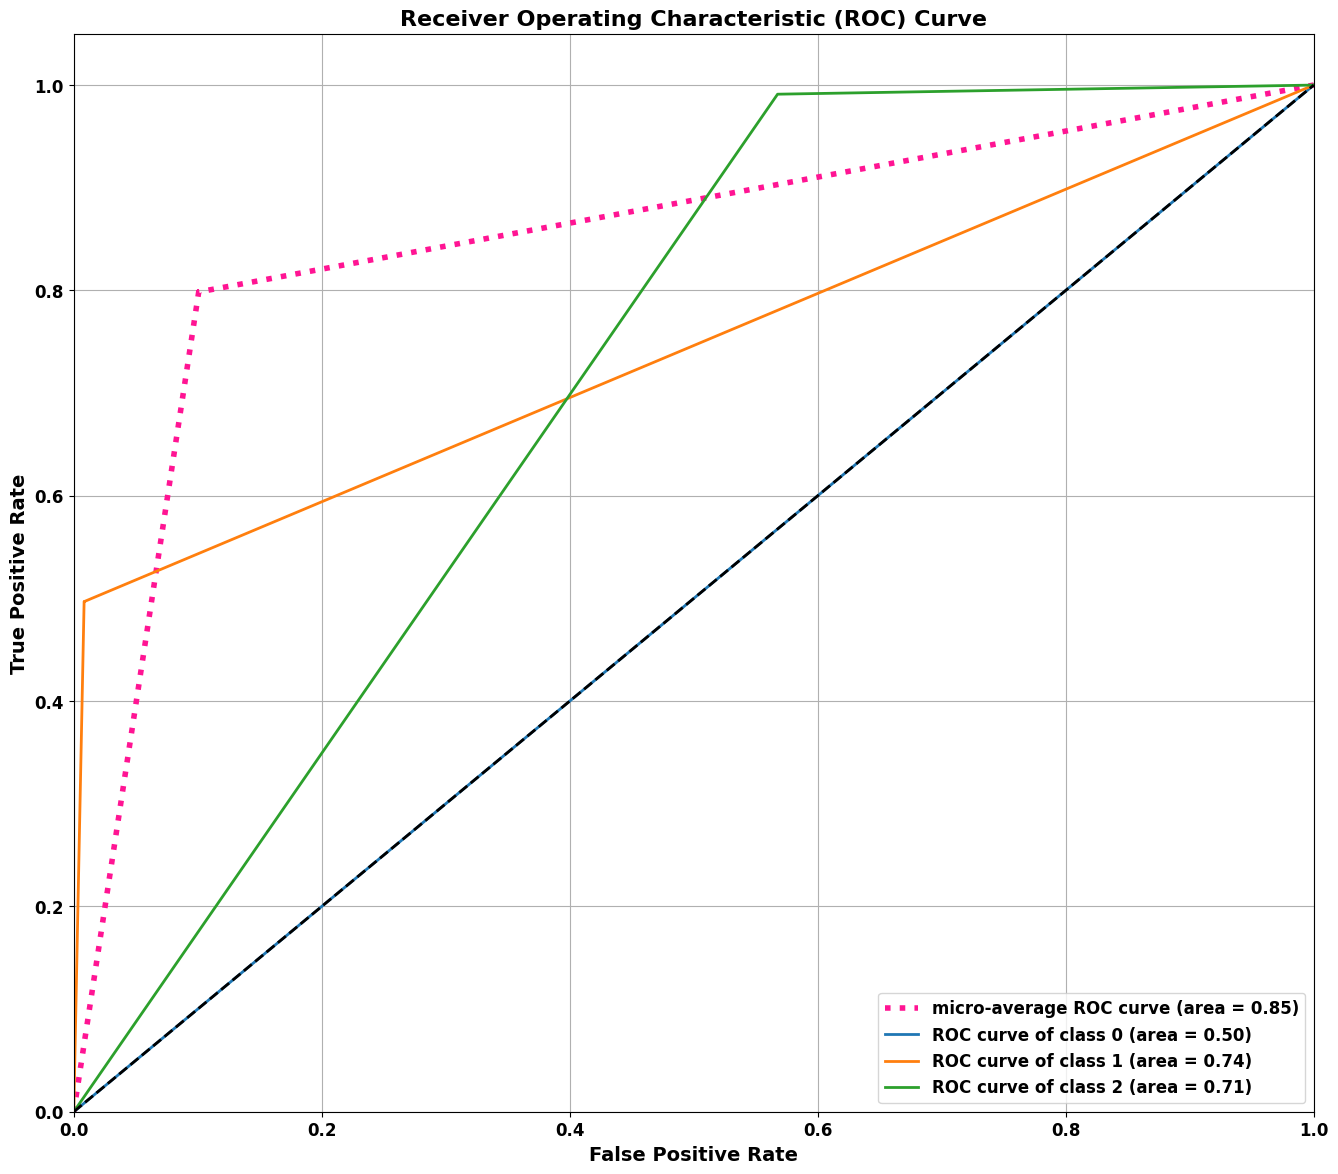

In [ ]:
ROC(loaded_model)

#LIME

In [ ]:
!pip install lime

In [ ]:
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import lime
import lime.lime_tabular
import numpy as np
import tensorflow as tf


model_path = '/content/50_15_ann_model.h5'
model = tf.keras.models.load_model(model_path)


encoder=LabelEncoder()
df['Type']=encoder.fit_transform(df['Type'])
X = df.iloc[:,4:]
y = df['Type']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)



explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train),
    feature_names=x_train.columns,
    class_names= ['arrhythmic', 'healthy', 'ischemic'],
)


# Select an instance to explain
instance_index = 1
instance = np.array(x_test)[instance_index]

# Define a prediction function that LIME can use
def predict_function(x):
    return model.predict(x).astype(float)

# Generate explanations
exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=predict_function,
    num_features=9,
    top_labels=3
)

# Visualize the explanation for a specific class
exp.show_in_notebook(show_table=True, show_all=True)

from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file("LIME.html")

#SHAP

In [ ]:
import tensorflow as tf
model_path = '/content/50_15_ann_model.h5'
model = tf.keras.models.load_model(model_path)

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np


encoder=LabelEncoder()
df['Type']=encoder.fit_transform(df['Type'])
X = df.iloc[:,4:]
y = df['Type']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)




encoder=LabelEncoder()
df['Type']=encoder.fit_transform(df['Type'])
X = df.iloc[:,4:]
y = df['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)



import shap

background = X_train[0:500]
forground = X_test[:25]

explainer = shap.KernelExplainer(model.predict,background)

shap_values = explainer.shap_values(forground)

# Now, create an Explanation object
expl = shap.Explanation(values=shap_values[0],
                        base_values=explainer.expected_value,
                        data=forground, # Adjust based on your actual test set
                        feature_names=X_train.columns)


## Local Explanation

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[..., 0], forground)

In [ ]:
shap.initjs()
expl = shap.Explanation(values=shap_values[..., 0],
                        base_values=explainer.expected_value,
                        data=forground,
                        feature_names=X_train.columns)

shap.plots.waterfall(expl[0])

In [ ]:
shap.initjs()
shap.plots.bar(expl[0])

## Global Explnation

In [ ]:
shap.initjs()
shap.plots.bar(expl)

In [ ]:
shap.initjs()
shap.summary_plot(expl)